# Ejercicios ensembling
En este ejercicio vas a realizar prediciones sobre un dataset de ciudadanos indios diabéticos. Se trata de un problema de clasificación en el que intentaremos predecir 1 (diabético) 0 (no diabético).

### 1. Carga las librerias que consideres comunes al notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
MODELS = []
ACCURACY = []

### 2. Lee los datos de [esta direccion](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
Los nombres de columnas son:
```Python
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
```

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

df = pd.read_csv(url, names=['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'])
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 3. Bagging
Para este apartado tendrás que crear un ensemble utilizando la técnica de bagging ([BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)), mediante la cual combinarás 100 [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Recuerda utilizar también [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) con 10 kfolds.

**Para este apartado y siguientes, no hace falta que dividas en train/test**, por hacerlo más sencillo. Simplemente divide tus datos en features y target.

Establece una semilla

In [4]:
X = df.drop('class',axis=1)
y = df['class']

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(max_depth=3, random_state=42)

bag_clf = BaggingClassifier(
    estimator = estimator,
    n_estimators=100, # Cantidad de árboles
    max_samples=100, # Muestras utilizadas en boostrapping
    bootstrap=True, # Usamos boostrapping: muestreo con reemplazo.
    random_state=42)

In [6]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluación
scores = cross_val_score(bag_clf, X, y, cv=kfold, scoring='accuracy')

print("Scores per fold:", scores)
print("\nPrecisión promedio:", scores.mean())

Scores per fold: [0.71428571 0.79220779 0.72727273 0.84415584 0.81818182 0.7012987
 0.81818182 0.77922078 0.69736842 0.80263158]

Precisión promedio: 0.7694805194805194


In [7]:
MODELS.append("BaggingClassifier")
ACCURACY.append(scores.mean())

Coeficientes de correlacion mas altos

In [8]:
df.corr()['class'].sort_values(ascending=False) 

class    1.000000
plas     0.466581
mass     0.292695
age      0.238356
preg     0.221898
pedi     0.173844
test     0.130548
skin     0.074752
pres     0.065068
Name: class, dtype: float64

### 4. Random Forest
En este caso entrena un [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) con 100 árboles y un `max_features` de 3. También con validación cruzada

In [9]:
from sklearn.ensemble import RandomForestClassifier

# Use 10 random trees
rnd_clf = RandomForestClassifier(n_estimators=100, max_features=3, random_state=42)

In [10]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluación
scores = cross_val_score(rnd_clf, X, y, cv=kfold, scoring='accuracy')

print("Scores per fold:", scores)
print("\nPrecisión promedio:", scores.mean())

Scores per fold: [0.72727273 0.77922078 0.74025974 0.85714286 0.84415584 0.72727273
 0.79220779 0.74025974 0.67105263 0.81578947]

Precisión promedio: 0.7694634313055365


In [11]:
MODELS.append("RandomForestClassifier")
ACCURACY.append(scores.mean())

### 5. AdaBoost
Implementa un [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) con 30 árboles.

In [12]:
from sklearn.ensemble import AdaBoostClassifier

adb_clf = AdaBoostClassifier(n_estimators=30, learning_rate=0.5, random_state=42)

adb_clf.fit(X, y)

c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.5, n_estimators=30, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score

predictions = adb_clf.predict(X)

print(accuracy_score(y, predictions))

0.7955729166666666


In [14]:
MODELS.append("AdaBoostClassifier")
ACCURACY.append(accuracy_score(y, predictions))

### 6. GradientBoosting
Implementa un [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) con 100 estimadores

In [15]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

In [16]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluación
scores = cross_val_score(gbc_clf, X, y, cv=kfold, scoring='accuracy')

print("Scores per fold:", scores)
print("\nPrecisión promedio:", scores.mean())

Scores per fold: [0.68831169 0.7012987  0.68831169 0.84415584 0.74025974 0.67532468
 0.79220779 0.72727273 0.69736842 0.81578947]

Precisión promedio: 0.73703007518797


In [17]:
MODELS.append("GradientBoostingClassifier")
ACCURACY.append(scores.mean())

### 7. XGBoost
Para este apartado utiliza un [XGBoostClassifier](https://docs.getml.com/latest/api/getml.predictors.XGBoostClassifier.html) con 100 estimadores. XGBoost no forma parte de la suite de modelos de sklearn, por lo que tendrás que instalarlo con pip install

In [18]:
!pip install xgboost

In [19]:
from xgboost import XGBClassifier

In [20]:
xgb_clf = XGBClassifier(n_estimators=100, eval_metric='auc', random_state=42)

In [21]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Evaluación
scores = cross_val_score(xgb_clf, X, y, cv=kfold, scoring='accuracy')

print("Scores per fold:", scores)
print("\nPrecisión promedio:", scores.mean())

Scores per fold: [0.68831169 0.67532468 0.71428571 0.81818182 0.80519481 0.71428571
 0.76623377 0.76623377 0.68421053 0.77631579]

Precisión promedio: 0.7408578263841422


In [22]:
MODELS.append("XGBClassifier")
ACCURACY.append(scores.mean())

### 8. Primeros resultados
Crea un dataframe con los resultados y sus algoritmos, ordenándolos de mayor a menor

In [23]:
pd.DataFrame(
    {
        'Model': MODELS,
        'ACCURACY': ACCURACY,
    }
).set_index('Model').sort_values('ACCURACY', ascending=True)

,ACCURACY
Model,
GradientBoostingClassifier,0.737030
XGBClassifier,0.740858
RandomForestClassifier,0.769463
BaggingClassifier,0.769481
AdaBoostClassifier,0.795573


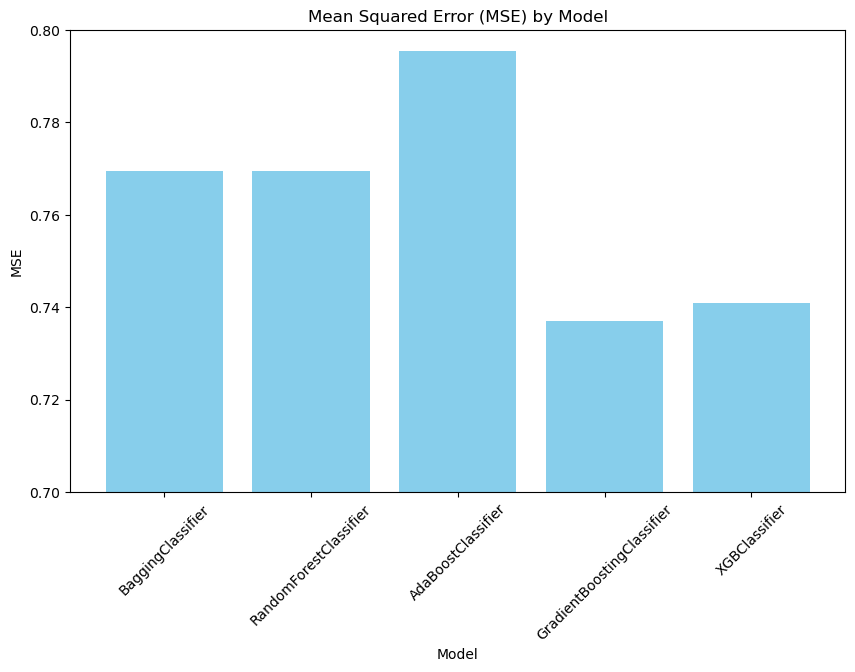

In [24]:
plt.figure(figsize=(10, 6))
plt.bar(MODELS, ACCURACY, color='skyblue')
plt.title('Mean Squared Error (MSE) by Model')
plt.ylim(0.7, 0.8)
plt.ylabel('MSE')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

### 9. Hiperparametrización
Vuelve a entrenar los modelos de nuevo, pero esta vez dividiendo el conjunto de datos en train/test y utilizando un gridsearch para encontrar los mejores hiperparámetros.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Bagging

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(max_depth=3, random_state=42)

bag_clf = BaggingClassifier(
    estimator = estimator,
    bootstrap=True,
    random_state=42)

In [27]:
param_grid = {'n_estimators':[10, 50, 100, 200],
              'max_samples':[50, 100, 200]
              }

In [28]:
from sklearn.model_selection import GridSearchCV

def execute_grid_search(model, param_grid):
    grid_model = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2)

    grid_model.fit(X_train, y_train)

    return grid_model

In [29]:
grid_model = execute_grid_search(bag_clf, param_grid)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ....................max_samples=50, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=50, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=50, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=50, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=50, n_estimators=10; total time=   0.0s
[CV] END ....................max_samples=50, n_estimators=50; total time=   0.0s
[CV] END ....................max_samples=50, n_estimators=50; total time=   0.0s
[CV] END ....................max_samples=50, n_estimators=50; total time=   0.0s
[CV] END ....................max_samples=50, n_estimators=50; total time=   0.0s
[CV] END ....................max_samples=50, n_estimators=50; total time=   0.0s
[CV] END ...................max_samples=50, n_estimators=100; total time=   0.0s
[CV] END ...................max_samples=50, n_es

In [30]:
grid_model.best_params_

{'max_samples': 50, 'n_estimators': 50}

In [31]:
from sklearn.metrics import accuracy_score

predictions = grid_model.predict(X_test)

print(accuracy_score(y_test, predictions))

0.7532467532467533


In [32]:
MODELS.append("BaggingClassifierGRID")
ACCURACY.append(accuracy_score(y_test, predictions))

#### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Use 10 random trees
rnd_clf = RandomForestClassifier(random_state=42)

In [34]:
param_grid = {'n_estimators':[100, 200, 300],
              'max_features': [2, 3, 5, 10]
              }

In [35]:
grid_model = execute_grid_search(rnd_clf, param_grid)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...................max_features=2, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=2, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=2, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=2, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=2, n_estimators=100; total time=   0.0s
[CV] END ...................max_features=2, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=2, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=2, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=2, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=2, n_estimators=200; total time=   0.1s
[CV] END ...................max_features=2, n_estimators=300; total time=   0.2s
[CV] END ...................max_features=2, n_es

In [36]:
grid_model.best_params_

{'max_features': 2, 'n_estimators': 200}

In [37]:
from sklearn.metrics import accuracy_score

predictions = grid_model.predict(X_test)

print(accuracy_score(y_test, predictions))

0.7532467532467533


In [38]:
MODELS.append("RandomForestClassifierGRID")
ACCURACY.append(accuracy_score(y_test, predictions))

#### AdaBoost

In [39]:
from sklearn.ensemble import AdaBoostClassifier

adb_clf = AdaBoostClassifier(n_estimators=30, learning_rate=0.5, random_state=42)

adb_clf.fit(X, y)

c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.5, n_estimators=30, random_state=42)

In [40]:
param_grid = {'n_estimators':[10, 30, 100, 200],
              'learning_rate': [0.01, 0.1, 0.5, 1.0]
              }

In [41]:
grid_model = execute_grid_search(adb_clf, param_grid)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\def

[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s

c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.2s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.1s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.1s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.1s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   0.1s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=30; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=30; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=30; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\def

[CV] END .................learning_rate=0.1, n_estimators=30; total time=   0.0s
[CV] END .................learning_rate=0.1, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.1s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.2s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.1s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.2s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.1, n_estimators=200; total time=   0.2s
[CV] END .................learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=0.5, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=0.5, n_estimators=30; total time=   0.0s
[CV] END .................learning_rate=0.5, n_estimators=30; total time=   0.0s
[CV] END .................learning_rate=0.5, n_estimators=30; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\def

[CV] END .................learning_rate=0.5, n_estimators=30; total time=   0.0s
[CV] END .................learning_rate=0.5, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.5, n_estimators=100; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.5, n_estimators=100; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=0.5, n_estimators=100; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=   0.2s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=   0.2s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=   0.2s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=   0.1s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=0.5, n_estimators=200; total time=   0.1s
[CV] END .................learning_rate=1.0, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=1.0, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=1.0, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=1.0, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=1.0, n_estimators=10; total time=   0.0s
[CV] END .................learning_rate=1.0, n_estimators=30; total time=   0.0s
[CV] END .................learning_rate=1.0, n_estimators=30; total time=   0.0s
[CV] END .................learning_rate=1.0, n_estimators=30; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\def

[CV] END .................learning_rate=1.0, n_estimators=30; total time=   0.0s
[CV] END .................learning_rate=1.0, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.0s
[CV] END ................learning_rate=1.0, n_estimators=100; total time=   0.0s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.0, n_estimators=200; total time=   0.1s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.0, n_estimators=200; total time=   0.1s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.0, n_estimators=200; total time=   0.1s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.0, n_estimators=200; total time=   0.1s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END ................learning_rate=1.0, n_estimators=200; total time=   0.2s


c:\Users\defco\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [42]:
grid_model.best_params_

{'learning_rate': 1.0, 'n_estimators': 30}

In [43]:
from sklearn.metrics import accuracy_score

predictions = grid_model.predict(X_test)

print(accuracy_score(y_test, predictions))

0.7532467532467533


In [44]:
MODELS.append("AdaBoostClassifierGRID")
ACCURACY.append(accuracy_score(y_test, predictions))

#### GradientBoost

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(random_state=42)

In [46]:
param_grid = {'n_estimators':[10, 30, 100, 200],
              'learning_rate': [0.01, 0.1, 0.5, 1.0]
              }

In [47]:
grid_model = execute_grid_search(gbc_clf, param_grid)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ................learning_rate=0.01, n_estimators=30; total time=   0.0s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV] END ...............learning_rate=0.01, n_es

In [48]:
grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [49]:
from sklearn.metrics import accuracy_score

predictions = grid_model.predict(X_test)

print(accuracy_score(y_test, predictions))

0.7489177489177489


In [50]:
MODELS.append("GradientBoostingClassifierGRID")
ACCURACY.append(accuracy_score(y_test, predictions))

#### XGBoost

In [51]:
xgb_clf = XGBClassifier(eval_metric='auc', random_state=42)

In [52]:
param_grid = {'n_estimators':[10, 30, 100, 200]
              }

In [53]:
grid_model = execute_grid_search(gbc_clf, param_grid)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=30; total time=   0.0s
[CV] END ....................................n_estimators=30; total time=   0.0s
[CV] END ....................................n_estimators=30; total time=   0.0s
[CV] END ....................................n_estimators=30; total time=   0.0s
[CV] END ....................................n_estimators=30; total time=   0.0s
[CV] END ...................................n_estimators=100; total time=   0.0s
[CV] END ...................................n_est

In [54]:
grid_model.best_params_

{'n_estimators': 100}

In [55]:
from sklearn.metrics import accuracy_score

predictions = grid_model.predict(X_test)

print(accuracy_score(y_test, predictions))

0.7489177489177489


In [56]:
MODELS.append("XGBClassifierGRID")
ACCURACY.append(accuracy_score(y_test, predictions))

In [57]:
pd.DataFrame(
    {
        'Model': MODELS,
        'ACCURACY': ACCURACY,
    }
).set_index('Model').sort_values('ACCURACY', ascending=True)

,ACCURACY
Model,
GradientBoostingClassifier,0.737030
XGBClassifier,0.740858
GradientBoostingClassifierGRID,0.748918
XGBClassifierGRID,0.748918
BaggingClassifierGRID,0.753247
RandomForestClassifierGRID,0.753247
AdaBoostClassifierGRID,0.753247
RandomForestClassifier,0.769463
BaggingClassifier,0.769481


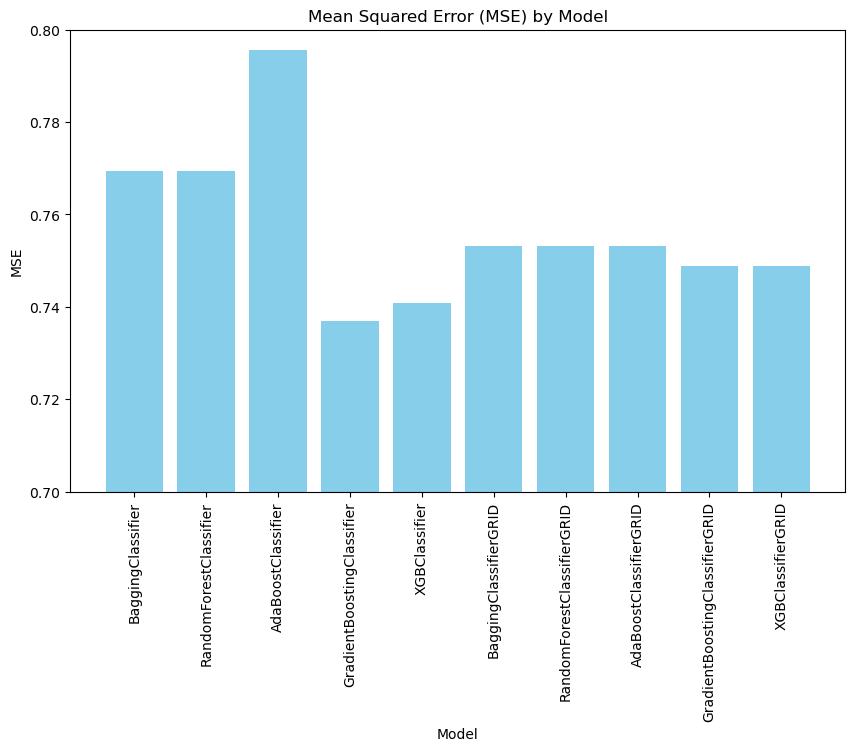

In [60]:
plt.figure(figsize=(10, 6))
plt.bar(MODELS, ACCURACY, color='skyblue')
plt.title('Mean Squared Error (MSE) by Model')
plt.ylim(0.7, 0.8)
plt.ylabel('MSE')
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.show()

### 10. Conclusiones finales

El modelo elegido es el GridSearchClassifier, que es el que mejor accuracy ha obtenido tras realizar la separación de train y test.